# Import Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Dataset Overview

In [2]:
data = pd.read_csv('Marketing-Campaign.csv')
data

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


## Dictionary

A/B Testing Marketing Promotions
Which promotion was the most effective?

Scenario:

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

The description of the data set: Our data set consists of 548 entries including:

- `MarketId`: an inhouse tag used to describe market types, we won't be using it
- `AgeOfStores`: Age of store in years (1–28). The mean age of a store is 8.5 years.
- `LocationID`: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- `Promotion`: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.
- `Sales in Thousands`: Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars.
- `Market` size: there are three types of market size: small, medium and large.
- `Week`: One of four weeks when the promotions were run (1–4).

# Exploratory Data Analysis

In [6]:
# Create Data Info

list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,MarketID,int64,0,0.0,10,"[1, 2, 3, 4]"
1,MarketSize,object,0,0.0,3,"[Medium, Small, Large]"
2,LocationID,int64,0,0.0,137,"[1, 2, 3, 4]"
3,AgeOfStore,int64,0,0.0,25,"[4, 5, 12, 1]"
4,Promotion,int64,0,0.0,3,"[3, 2, 1]"
5,week,int64,0,0.0,4,"[1, 2, 3, 4]"
6,SalesInThousands,float64,0,0.0,517,"[33.73, 35.67, 29.03, 39.25]"


## Descriptive Statistic

In [9]:
# devide features by its data type
num = data.select_dtypes(include='number').columns
cat = data.select_dtypes(include='object').columns

In [16]:
eda = data.copy()

In [17]:
eda.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,95%,99%,max
MarketID,548.0,5.715328,2.877001,1.00,1.0000,1.0000,2.000,3.000,6.0,8.0000,10.000,10.0000,10.00
LocationID,548.0,479.656934,287.973679,1.00,2.0000,7.3500,101.000,216.000,504.0,708.0000,913.650,919.0000,920.00
AgeOfStore,548.0,8.503650,6.638345,1.00,1.0000,1.0000,1.000,4.000,7.0,12.0000,23.000,27.0000,28.00
Promotion,548.0,2.029197,0.810729,1.00,1.0000,1.0000,1.000,1.000,2.0,3.0000,3.000,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.0000,1.0000,1.000,1.750,2.5,3.2500,4.000,4.0000,4.00
SalesInThousands,548.0,53.466204,16.755216,17.34,24.3154,30.6215,35.412,42.545,50.2,60.4775,88.458,94.6738,99.65


In [18]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


## Univariate Analysis

In [15]:
nums = num[2:]
nums

Index(['AgeOfStore', 'Promotion', 'week', 'SalesInThousands'], dtype='object')

### Boxplot

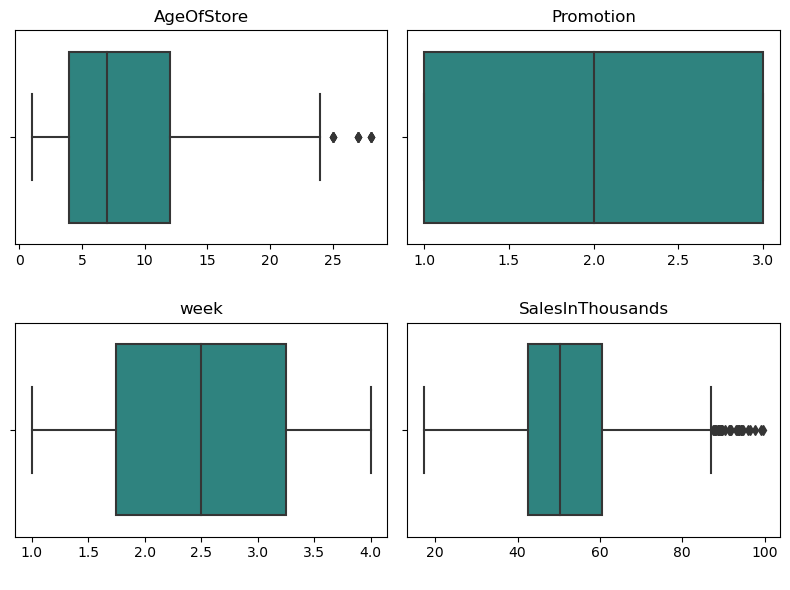

In [22]:
# Boxplot
plt.figure(figsize=(8,6))
for i in range(0, len(nums)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=eda[nums[i]], palette='viridis')
    plt.title(nums[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

### Violinplot

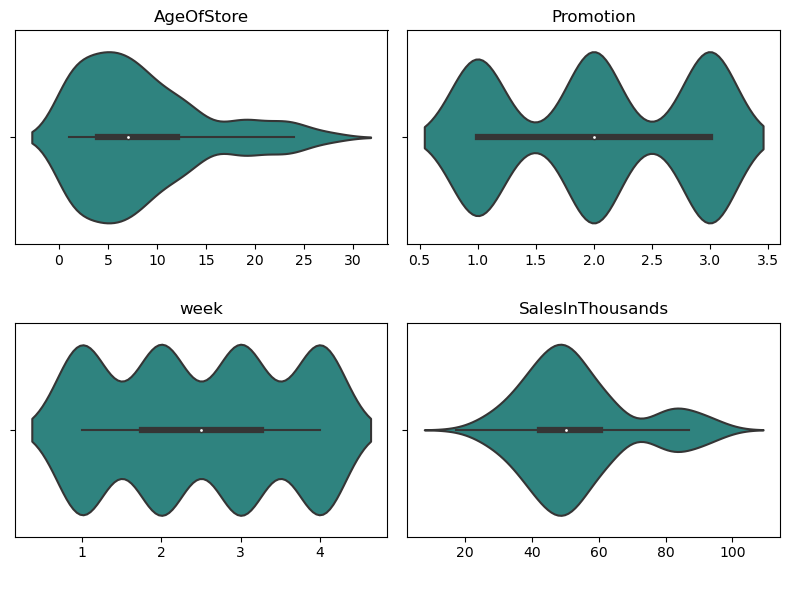

In [23]:
# Violinplot
plt.figure(figsize=(8,6))
for i in range(0, len(nums)):
    plt.subplot(2,2,i+1)
    sns.violinplot(x=eda[nums[i]], palette='viridis')
    plt.title(nums[i], fontsize=12)
    plt.xlabel(' ')
    plt.tight_layout()

### Countplot

Text(0.5, 1.0, 'Market Size')

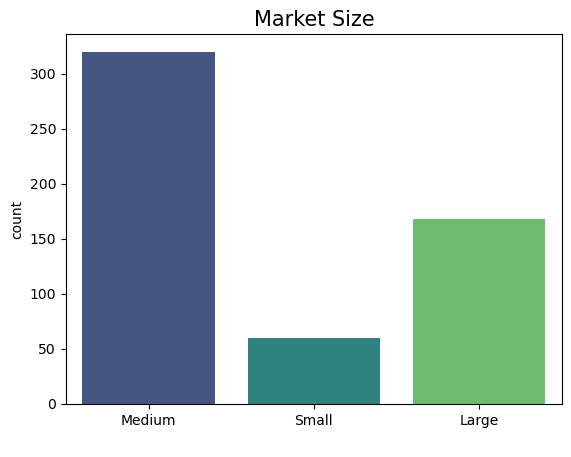

In [32]:
sns.countplot(x=eda['MarketSize'], palette='viridis')
plt.xlabel(' ')
plt.title('Market Size', fontsize=15)

# Pre Processing

## Check Missing Values

In [33]:
data.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

## Check Duplicated Values

In [34]:
data.duplicated().sum()

0

## Check Outlier

In [36]:
data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,95%,99%,max
MarketID,548.0,5.715328,2.877001,1.00,1.0000,1.0000,2.000,3.000,6.0,8.0000,10.000,10.0000,10.00
LocationID,548.0,479.656934,287.973679,1.00,2.0000,7.3500,101.000,216.000,504.0,708.0000,913.650,919.0000,920.00
AgeOfStore,548.0,8.503650,6.638345,1.00,1.0000,1.0000,1.000,4.000,7.0,12.0000,23.000,27.0000,28.00
Promotion,548.0,2.029197,0.810729,1.00,1.0000,1.0000,1.000,1.000,2.0,3.0000,3.000,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.0000,1.0000,1.000,1.750,2.5,3.2500,4.000,4.0000,4.00
SalesInThousands,548.0,53.466204,16.755216,17.34,24.3154,30.6215,35.412,42.545,50.2,60.4775,88.458,94.6738,99.65


## Summary

Data is clean, no missing values, no outlier detected, no strange values, and no duplicated values

# Business Insights

## Sales By Promotion

Text(0.5, 1.0, 'Total Sales Gained Each Promotion')

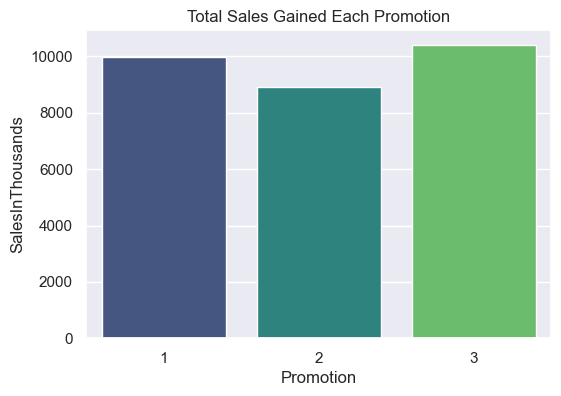

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x='Promotion', y='SalesInThousands', palette='viridis',
            data=pd.DataFrame(data.groupby('Promotion').sum()['SalesInThousands']).reset_index())
plt.title('Total Sales Gained Each Promotion', fontsize=12)

## Market Sizes Across Different Promotions

In [43]:
# Using unstack
promotion_x_marketsize = data.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')
promotion_x_marketsize

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


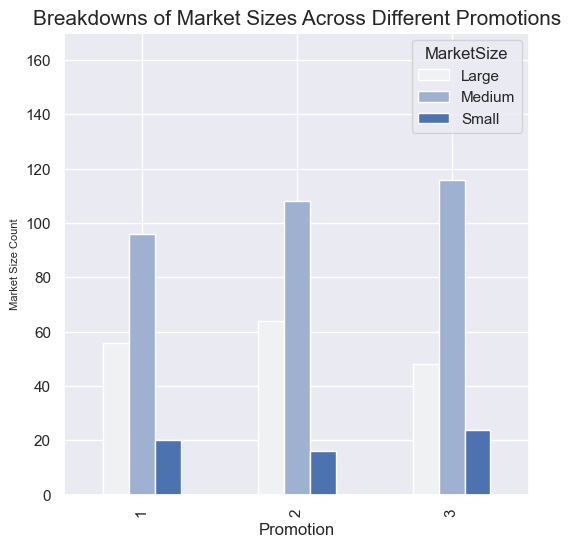

In [55]:
# Put this into a plot

cmap = sns.color_palette("light:b", as_cmap=True)
ax = data.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(6,6),
    grid=True,
    cmap=cmap)

ax.set_ylabel('Market Size Count', fontsize=8)
ax.set_title('Breakdowns of Market Sizes Across Different Promotions', fontsize=15)
plt.ylim(0,170)
plt.show()

## Overall Distributions Store Ages

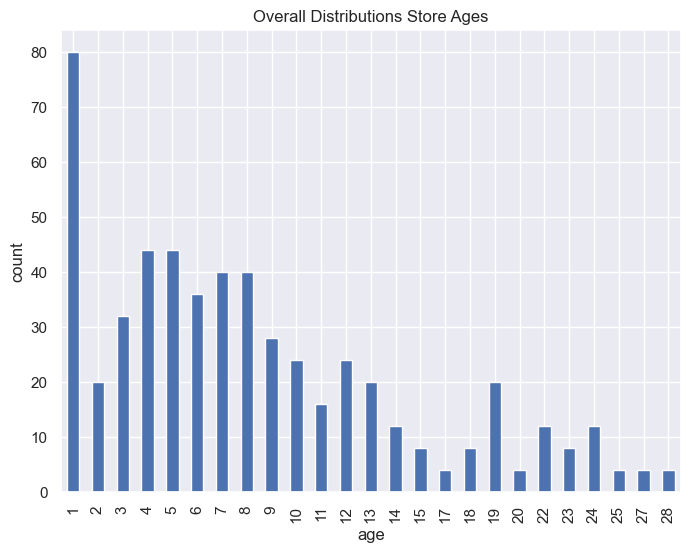

In [57]:
# Store Age Distribution
ax = data.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar', 
    figsize=(8,6),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

Text(0.5, 1.0, 'Sales Distribution by Market ID')

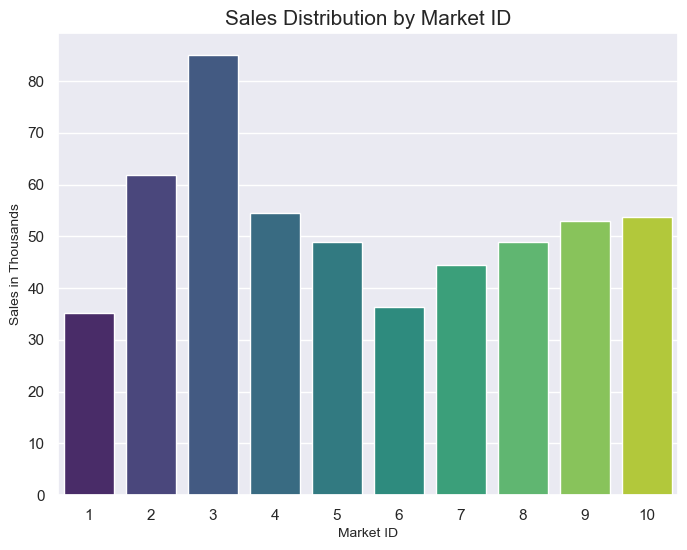

In [60]:
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='MarketID', y='SalesInThousands', data=data, ci=None, palette='viridis')
plt.xlabel('Market ID', fontsize=10)
plt.ylabel('Sales in Thousands', fontsize=10)
plt.title('Sales Distribution by Market ID', fontsize=15)

# Performing Hypothesis Testing Yeaay!

In [61]:
# find means, stds, and ns
means = data.groupby('Promotion').mean()['SalesInThousands']
stds = data.groupby('Promotion').std()['SalesInThousands']
ns = data.groupby('Promotion').count()['SalesInThousands']
print('means:', means)
print('\n')
print('stds:', stds)
print('\n')
print('ns:', ns)

means: Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64


stds: Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64


ns: Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


## Pvalue and Tvalue

`T-Value` <br>
The t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the grups.

`P-Value` <br>
P-value measures the probability that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically significant difference there will be between the two groups



## Comparing Promotion 1 vs Promotion 2 in an Hypothesis Test

H0: Promotion 1 and Promotion 2 **have same** Sales Revenue <br>
H1: Promotion 1 and Promotion 2 **do not have same** Sales Revenue

In [66]:
t_1_vs_2 = (means.iloc[0] - means.iloc[1])/np.sqrt((stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1]))

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2

In [69]:
print('P-Value : {0:0.4f}'.format(p_1_vs_2))
if p_1_vs_2 >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 0.0000
Sufficient to reject H0


In [67]:
print('t-test(1 vs 2):', t_1_vs_2)
print('Pvalue(1 vs 2):', p_1_vs_2)

t-test(1 vs 2): 6.427528670907475
Pvalue(1 vs 2): 4.143296816749853e-10


Our P-Value is close to 0 which suggests that there is good evidence to **REJECT the Null Hypothesis**. Meaning `there is a statistical difference between the two groups`. Our threshold rejectings the Null is usually less than 0.05.

Our t-test shows that the marketing performances for these two groups are significantly different and that **promotion group 1 outperforms promotion group 2**

## Comparing Promotion 1 vs Promotion 3 in an Hypothesis Test

H0: Promotion 1 and Promotion 3 **have same** Sales Revenue <br>
H1: Promotion 1 and Promotion 3 **do not have same** Sales Revenue

In [71]:
t_1_vs_3 = (
    means.iloc[0] - means.iloc[2])/np.sqrt((stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[2]**2/ns.iloc[2]))

df_1_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_3 = (1 - stats.t.cdf(t_1_vs_3, df=df_1_vs_3))*2

In [72]:
print('P-Value : {0:0.4f}'.format(p_1_vs_3))
if p_1_vs_3 >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 0.1206
Insufficient to reject H0


In [73]:
print('t-test(1 vs 3):', t_1_vs_3)
print('Pvalue(1 vs 3):', p_1_vs_3)

t-test(1 vs 3): 1.556022430775863
Pvalue(1 vs 3): 0.12058631176434842


## Comparing Promotion 2 vs Promotion 3 in an Hypothesis Test

H0: Promotion 2 and Promotion 3 **have same** Sales Revenue <br>
H1: Promotion 2 and Promotion 3 **do not have same** Sales Revenue

In [74]:
t_2_vs_3 = (
    means.iloc[1] - means.iloc[2])/np.sqrt((stds.iloc[1]**2/ns.iloc[1]) + (stds.iloc[2]**2/ns.iloc[2]))

df_2_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_2_vs_3 = (1 - stats.t.cdf(t_2_vs_3, df=df_2_vs_3))*2

In [75]:
print('P-Value : {0:0.4f}'.format(p_2_vs_3))
if p_2_vs_3 >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 2.0000
Insufficient to reject H0


## Anova

In [77]:
# Step 1
# H0 : Avg SalesInThousands is the same for all promotion
# H1 : Avg SalesInThousands is not the same for all promotion

# Langkah 2
df_promo1 = data[data['Promotion'] == 1]
df_promo2 = data[data['Promotion'] == 2]
df_promo3 = data[data['Promotion'] == 3]

In [76]:
data.groupby(['Promotion'])['SalesInThousands'].mean()

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [81]:
# Step 3
anova = stats.f_oneway(df_promo1['Promotion'],df_promo2['Promotion'],df_promo3['Promotion'])

In [84]:
pvalue = anova.pvalue
print(pvalue)
if pvalue >= 0.05:
    print('Insufficient Reject H0')
else:
    print('Sufficient Reject H0')

0.0
Sufficient Reject H0


## Summary & Insights

- `Promotion 1` **is outperform** and validated by statistic test
- We have to do analysis why `Promotion 1` better and brings more sales rather than `Promotion 2`